In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
import os
import wget
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Define data inputs and outputs

In [39]:
input_path=[]
Petlabel=[]
for class_input in os.listdir('PetImages'):
    for path in os.listdir('PetImages/'+class_input):
        if class_input == 'Cats':
            Petlabel.append(0)
        else:
            Petlabel.append(1)
        input_path.append(os.path.join("PetImages", class_input, path))
        

In [40]:
print(input_path[0],Petlabel[0])

PetImages\Cats\0.jpg 0


In [41]:
#Create dataframe

In [42]:
df =pd.DataFrame()
df['Images']= input_path
df['Petlabel']=Petlabel
df.Petlabel=df['Petlabel'].astype(str)
# SHUFFLING DATA
df = df.sample(frac=1).reset_index(drop=True)
df.head(20)

,Images,Petlabel
0,PetImages\Dogs\70.jpg,1
1,PetImages\Dogs\94.jpg,1
2,PetImages\Cats\123.jpg,0
3,PetImages\Dogs\56.jpg,1
4,PetImages\Dogs\73.jpg,1
5,PetImages\Cats\22.jpg,0
6,PetImages\Cats\43.jpg,0
7,PetImages\Dogs\46.jpg,1
8,PetImages\Dogs\139.jpg,1
9,PetImages\Dogs\62.jpg,1


In [43]:
from keras.preprocessing.image import ImageDataGenerator

In [44]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [45]:
# Define Normalization Prameters 
train_generator = ImageDataGenerator(
            rescale = 1./255,
            rotation_range = 40, # to avoid overfitting
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

train_iterator = train_generator.flow_from_dataframe(
            df,
            x_col='Images',
            y_col='Petlabel',
            target_size=(158,158),
            batch_size=512,
            class_mode='binary'
)

Found 239 validated image filenames belonging to 2 classes.


In [46]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [47]:
val_generator = ImageDataGenerator(rescale = 1./255)
val_iterator = val_generator.flow_from_dataframe(
            test,
            x_col='Images',
            y_col='Petlabel',
            target_size=(158,158),
            batch_size=512,
            class_mode='binary'
)


Found 48 validated image filenames belonging to 2 classes.


In [48]:
# Model Creation

In [49]:
Model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(158,158,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation= 'sigmoid')
    
])

In [50]:
import tensorflow.keras.optimizers
Model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 156, 156, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 76, 76, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

In [51]:
# Model Train

In [52]:
Model_train=Model.fit(train_iterator,epochs=50, validation_data=val_iterator)

Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.6912 - accuracy: 0.5230 - val_loss: 1.3905 - val_accuracy: 0.6042
Epoch 2/50
1/1 [==============================] - 16s 16s/step - loss: 1.5189 - accuracy: 0.5230 - val_loss: 1.0733 - val_accuracy: 0.3958
Epoch 3/50
1/1 [==============================] - 17s 17s/step - loss: 0.9128 - accuracy: 0.4770 - val_loss: 1.0743 - val_accuracy: 0.3958
Epoch 4/50
1/1 [==============================] - 18s 18s/step - loss: 0.9059 - accuracy: 0.4770 - val_loss: 0.8386 - val_accuracy: 0.3958
Epoch 5/50
1/1 [==============================] - 17s 17s/step - loss: 0.7646 - accuracy: 0.4770 - val_loss: 0.7206 - val_accuracy: 0.3958
Epoch 6/50
1/1 [==============================] - 17s 17s/step - loss: 0.7053 - accuracy: 0.4770 - val_loss: 0.6795 - val_accuracy: 0.6458
Epoch 7/50
1/1 [==============================] - 17s 17s/step - loss: 0.6886 - accuracy: 0.5941 - val_loss: 0.6600 - val_accuracy: 0.6042
Epoch 8/50
1/1 [===========

<Figure size 432x288 with 0 Axes>

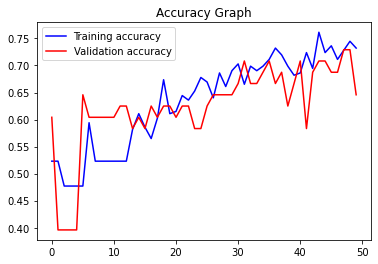

<Figure size 432x288 with 0 Axes>

In [53]:
# evaluate model
acc = Model_train.history['accuracy']
val_acc = Model_train.history['val_accuracy']
epochs= range(len(acc))
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()